In [1]:
!pip install transformers datasets
!pip install --upgrade sympy
!pip install --upgrade datasets
!pip install evaluate
!pip install transformers
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 49.5 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uni

In [2]:
!pip install evaluate
import os
from datasets import Dataset
import torch
from PIL import Image
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation
import torch
from torch import nn
import evaluate
import zipfile
import os
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
zip_path = "/content/drive/My Drive/data_validmask.zip"
output_dir = "/content/data"
os.makedirs(output_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"ZIP 파일이 해제되었습니다: {output_dir}")

ZIP 파일이 해제되었습니다: /content/data


In [14]:
test_images_dir = "/content/data/content/car_damage_data_v/test/image"
test_masks_dir = "/content/data/content/car_damage_data_v/masks/test"

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
label_mapping = {'Background': 0, 'Damaged': 1}
id2label = {v: k for k, v in label_mapping.items()}
label2id = {k: v for k, v in label_mapping.items()}

In [8]:
model_name = "nvidia/mit-b3"
processor = SegformerImageProcessor.from_pretrained(model_name)
model = SegformerForSemanticSegmentation.from_pretrained(
    model_name,
    num_labels=len(id2label),
    id2label=id2label,
    label2id=label2id
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


config.json:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/179M [00:00<?, ?B/s]

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b3 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.batch_norm.running_mean', 'decode_head.batch_norm.running_var', 'decode_head.batch_norm.weight', 'decode_head.classifier.bias', 'decode_head.classifier.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_fuse.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
model.load_state_dict(torch.load("best_model (4).pth", map_location=device))
model.to(device)
model.eval()

print("모델이 성공적으로 로드되었습니다.")

<ipython-input-23-6035eaf4e476>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model (4).pth", map_location=device))


모델이 성공적으로 로드되었습니다.


In [10]:
def load_data(images_dir, masks_dir):
    images = sorted(os.listdir(images_dir))
    masks = sorted(os.listdir(masks_dir))
    data = []
    for img_name, mask_name in zip(images, masks):
        image_path = os.path.join(images_dir, img_name)
        mask_path = os.path.join(masks_dir, mask_name)
        data.append({"image": image_path, "mask": mask_path})
    return data

In [15]:
test_data = load_data(test_images_dir, test_masks_dir)

In [12]:
def preprocess(example):
    image = Image.open(example["image"]).convert("RGB").resize((512, 512))
    mask = Image.open(example["mask"]).resize((512, 512))
    encoding = processor(image, mask, return_tensors="pt")
    encoding = {k: v.squeeze(0) for k, v in encoding.items()}
    return encoding

In [16]:
test_dataset = Dataset.from_list(test_data).map(preprocess)
test_dataset.set_format(type="torch", columns=["pixel_values", "labels"])

Map:   0%|          | 0/1514 [00:00<?, ? examples/s]

In [17]:
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [24]:
metric = evaluate.load("mean_iou")

def evaluate_model(model, data_loader):
    model.eval()
    preds = []
    refs = []
    with torch.no_grad():
        for batch in data_loader:
            pixel_values = batch["pixel_values"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(pixel_values=pixel_values)
            logits = outputs.logits

            upsampled_logits = torch.nn.functional.interpolate(
                logits, size=labels.shape[-2:], mode="bilinear", align_corners=False
            )
            pred_labels = upsampled_logits.argmax(dim=1).detach().cpu().numpy()
            refs.append(labels.detach().cpu().numpy())
            preds.append(pred_labels)

    preds = np.concatenate(preds, axis=0)
    refs = np.concatenate(refs, axis=0)
    results = metric.compute(
        predictions=preds,
        references=refs,
        num_labels=len(id2label),
        ignore_index=None,
        reduce_labels=processor.do_reduce_labels,
    )
    return results

In [25]:
test_results = evaluate_model(model, test_loader)
print("Test Dataset Evaluation Results:")
print(test_results)

Test Dataset Evaluation Results:
{'mean_iou': 0.7080083129281127, 'mean_accuracy': 0.7957640041610181, 'overall_accuracy': 0.9423303314370239, 'per_category_iou': array([0.9391302 , 0.47688643]), 'per_category_accuracy': array([0.97230858, 0.61921943])}


In [26]:
def visualize_sample(model, dataset, index=0):
    model.eval()
    sample = dataset[index]
    pixel_values = sample["pixel_values"].unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(pixel_values=pixel_values)
        logits = outputs.logits
        upsampled_logits = torch.nn.functional.interpolate(
            logits, size=(512, 512), mode="bilinear", align_corners=False
        )
        pred_mask = upsampled_logits.argmax(dim=1).squeeze().cpu().numpy()

    image = Image.open(test_data[index]["image"]).convert("RGB").resize((512, 512))
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(pred_mask, cmap="jet", alpha=0.6)
    plt.title("Predicted Mask")
    plt.axis("off")
    plt.show()

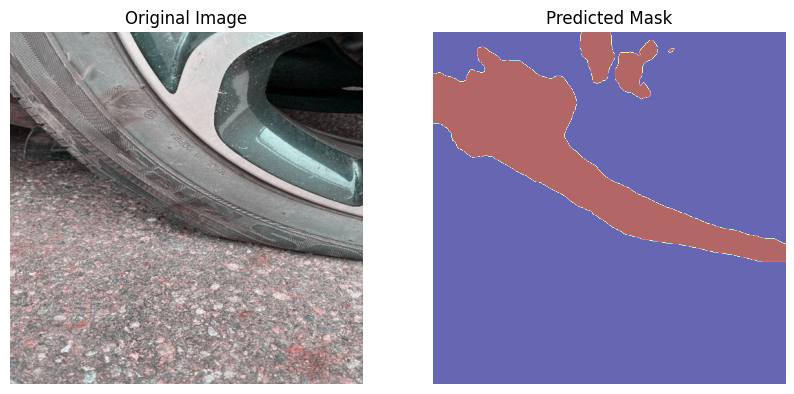

In [27]:
visualize_sample(model, test_dataset, index=0)